### 평가 23.05.19. 1번

- 당뇨병

In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
df.isna().sum().sum()

0

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.age.values.reshape(-1, 1),  diabetes.target,
    test_size=0.1, random_state=2023
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((397, 1), (45, 1), (397,), (45,))

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.0913031570868813

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
pred = lr.predict(X_test)
r2_score(y_test, pred), mean_squared_error(y_test, pred)

(0.0913031570868813, 5891.207728315803)

1. Feature별로 target과 단일회귀를 하였을 경우의 결정계수(R Squared)와 MSE 값

In [10]:
print(f'\tR squared\t   MSE')
for feature in df.columns[:-1]:
    lr = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(
        df[feature].values.reshape(-1, 1),  diabetes.target,
        test_size=0.1, random_state=2023
    )
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    print(f'{feature :}\t{r2_score(y_test, pred):.4f}\t\t{mean_squared_error(y_test, pred):.4f}')

	R squared	   MSE
age	0.0913		5891.2077
sex	-0.0074		6531.1417
bmi	0.2906		4598.9821
bp	0.2365		4949.6227
s1	0.1125		5753.8859
s2	0.0947		5869.3343
s3	0.2630		4777.8158
s4	0.3684		4094.4733
s5	0.3563		4173.4861
s6	0.1759		5342.8247


2. BMI와 target을 단일회귀를 하고, 산점도와 회귀선

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1, 1),  diabetes.target,
    test_size=0.1, random_state=2023
)

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [12]:
lr.coef_, lr.intercept_,  lr.score(X_test, y_test)

(array([950.04737294]), 150.97094830777968, 0.2906241522424071)

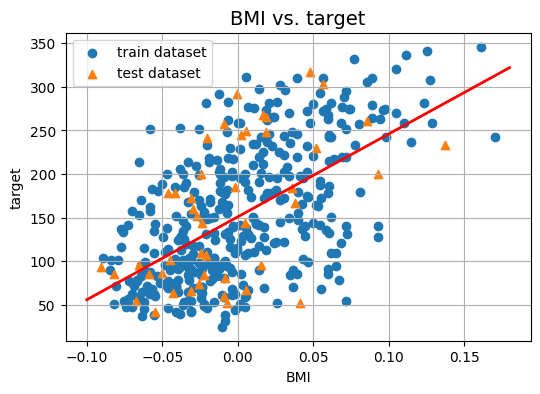

In [13]:
import numpy as np
import matplotlib.pyplot as plt 

xs = np.array([-0.1, 0.18])
ys = np.dot(lr.coef_[0], xs) + lr.intercept_

plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, label='train dataset')
plt.plot(xs, ys, 'r-', lw=2)
plt.scatter(X_test, y_test, marker='^', label='test dataset')
plt.grid()
plt.xlabel('BMI')
plt.ylabel('target')
plt.title('BMI vs. target', fontsize=14)
plt.legend()
plt.show()



3. 모든 Feature를 독립변수로 가정하고 5가지 이상의 종류를 사용하여 다중회귀를
   한 후에 회귀기(Regressor) 종류별로 결정계수(R Squared)와 MSE 값

In [14]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
df = df[['bmi', 'bp', 's3', 's4', 's5', 's6', 'target']]
df.head()

,bmi,bp,s3,s4,s5,s6,target
0,0.061696,0.021872,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.051474,-0.026328,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.044451,-0.005670,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.011595,-0.036656,-0.036038,0.034309,0.022688,-0.009362,206.0
4,-0.036385,0.021872,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1].values, df.target.values, test_size=0.1, random_state=2023
)

In [17]:
# 1. LinearRegression()
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
print(f'{r2_lr:.4f}, {mse_lr:.4f}')

0.5155, 3141.1900


In [18]:
# 2. SVR
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)
print(f'{r2_sv:.4f}, {mse_sv:.4f}')

0.2451, 4894.3392


In [19]:
# 3. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
print(f'{r2_rf:.4f}, {mse_rf:.4f}')

0.4873, 3323.8782


In [20]:
# 4. XGBoost
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)
print(f'{r2_xg:.4f}, {mse_xg:.4f}')

0.4261, 3720.5130


In [21]:
# 5. Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=2023)
ridge.fit(X_train, y_train)
pred_rg = ridge.predict(X_test)
r2_rg = r2_score(y_test, pred_rg)
mse_rg = mean_squared_error(y_test, pred_rg)
print(f'{r2_rg:.4f}, {mse_rg:.4f}')


0.4795, 3374.1755


In [22]:
# 6. Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=2023)
lasso.fit(X_train, y_train)
pred_ls = lasso.predict(X_test)
r2_ls = r2_score(y_test, pred_ls)
mse_ls = mean_squared_error(y_test, pred_ls)
print(f'{r2_ls:.4f}, {mse_ls:.4f}')

0.3414, 4269.5669


In [57]:
print('\tLR\t SV\t   RF\t    XG\t     Ridge\tLasso')
print(f'R s\t{r2_lr:.4f}\t {r2_sv:.4f}\t   {r2_rf:.4f}   {r2_xg:.4f}   {r2_rg:.4f}\t{r2_ls:.4f}')
print(f'MSE\t{mse_lr:.3f} {mse_sv:.3f}  {mse_rf:.3f} {mse_xg:.3f} {mse_rg:.3f}\t{mse_ls:.3f}')

	LR	 SV	   RF	    XG	     Ridge	Lasso
R s	0.5155	 0.2451	   0.4873   0.4261   0.4795	0.3414
MSE	3141.190 4894.339  3323.878 3720.513 3374.175	4269.567
